# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
import cv2

%matplotlib inline

In [2]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(batch, batch_size):
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    fig, axs = plt.subplots(batch_size, figsize=(10, 10*batch_size))
    for idx, element in enumerate(batch):
        ax = axs[idx]
        image = element["image"].numpy()
        width, height, _ = image.shape
        ax.imshow(image)
        for cl, bb in zip(element["groundtruth_classes"].numpy(), element["groundtruth_boxes"].numpy()):
            y1, x1, y2, x2 = bb
            rec = Rectangle((x1*width, y1*height), x2*width- x1*width, y2*height-y1*height, facecolor='none', 
                            edgecolor=colormap[cl])
            ax.add_patch(rec)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

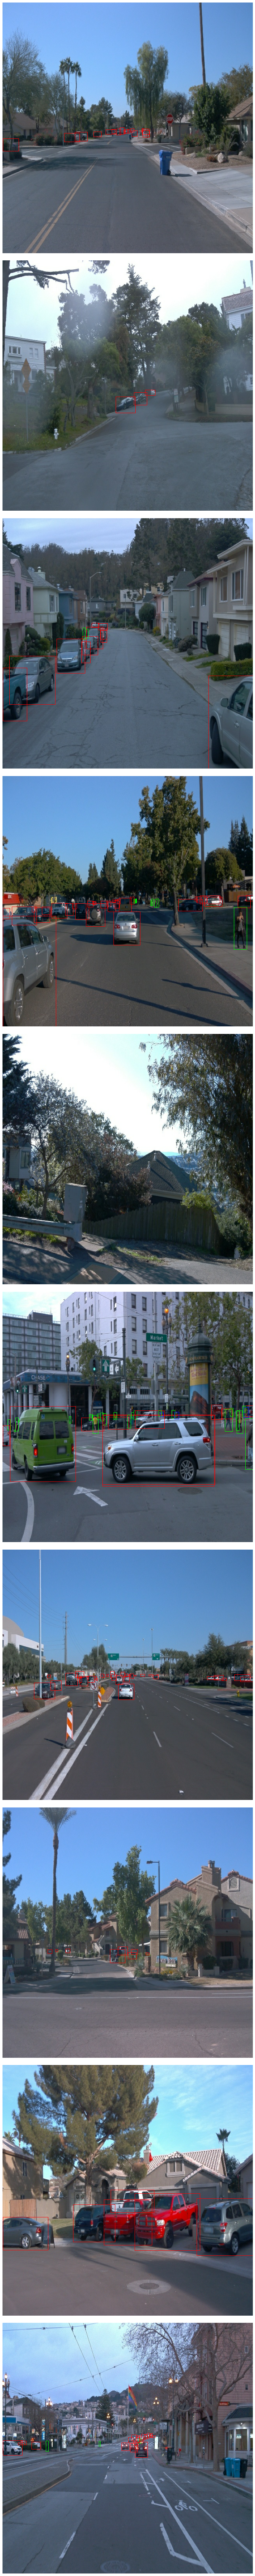

In [4]:
# Display 10 random images in dataset
dataset.shuffle(10000)
display_instances(dataset.take(10), 10)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
elements = 0
class_count = {1: 0, 2: 0, 4: 0}
histograms = np.zeros((256,3000,3))

for idx, element in enumerate(dataset):
    elements += 1
    image = element['image'].numpy()
    classes = element['groundtruth_classes'].numpy()
     
    # count the occurences of each class
    for obj_class in classes:
        class_count[obj_class] += 1
        
    color = ('b','g','r')
    img_hst = np.zeros((256,1,3))
    for i,col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        img_hst[:,:,i] = histr
    # create array with the histogram of each image
    histograms[:,elements:,:] = img_hst;
    if elements == histograms.shape[1]:
        break

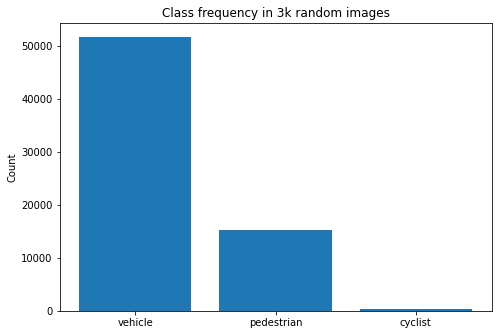

In [6]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.set_title('Class frequency in 3k random images')
ax.set_ylabel('Count')

labels = ['vehicle', 'pedestrian', 'cyclist']
ax.bar(labels, list(class_count.values()))
plt.show()

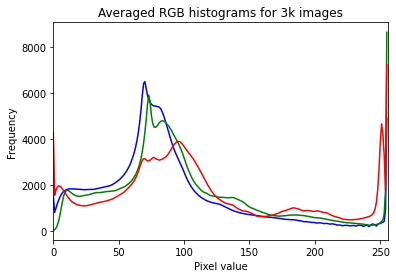

In [7]:
color = ('b','g','r')
plt.figure()
averaged_histograms = np.mean(histograms, axis=1)
for i,col in enumerate(color):
    plt.plot(averaged_histograms[:,i],color = col)
    plt.xlim([0,256])
plt.title('Averaged RGB histograms for 3k images')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.show()